#### 【지도학습 -회귀】
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예: 거리, 시간, 무게, 집가격 등등...
- 주제 : 공부시간에 따른 예측
- 방법 : linear

[1] 모듈 로딩 및 데이터 준비 <hr>

In [140]:
# =========================================
### [1-1] 모듈 로딩
# =========================================
# 기본모듈
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

# ML데이터셋 및 학습관련 모듈
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# COW활성화 : 복사와 공유 자동 설정 기능 활성화
pd.options.mode.copy_on_write = True

In [141]:
# =========================================
### [1-1] 데이터 준비 및 확인
# =========================================
# 데이터 준비

hour = [1,2,3,5,7,8,10]
score = [15,32,45,55,60,73,91]
dataDF = pd.DataFrame({"hour":hour,"score":score})

dataDF.info()
dataDF.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hour    7 non-null      int64
 1   score   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


,hour,score
0,1,15
1,2,32
2,3,45
3,5,55
4,7,60


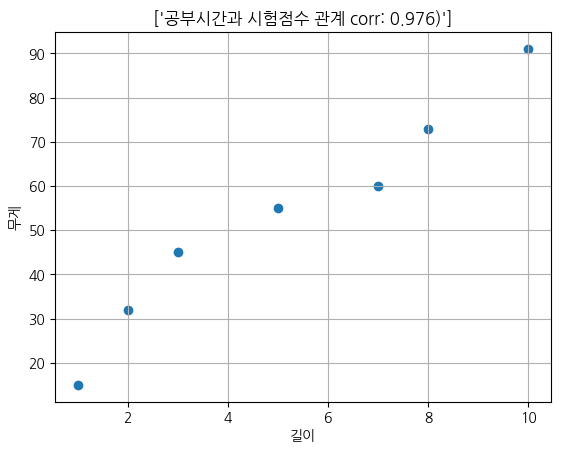

In [142]:
# 공부시간과  성적 관계시각화
# corr 기본 -> pearson 피쳐와 타겟의 직선의 선형성
corr_ = dataDF.corr(numeric_only=True)["score"]
corr_value = corr_["hour"]
plt.scatter(dataDF.hour,dataDF.score)
plt.xlabel("길이")
plt.ylabel("무게")
plt.grid()
plt.title([f"공부시간과 시험점수 관계 corr: {corr_value:.3f})"])
plt.show()

[2] 피쳐와 타겟/학습용 테스트용 분리<hr>

In [143]:
featureDF = dataDF[dataDF.columns[0:1]]
targetSR = dataDF[dataDF.columns[1]]


print(featureDF.shape,featureDF.ndim)
print(targetSR.shape,targetSR.ndim)



(7, 1) 2
(7,) 1


In [144]:
x_train,x_test,y_train,y_test = train_test_split(featureDF,
                                                 targetSR,
                                                 test_size=0.2,
                                                 random_state=10,
                                                #  stratify=targetSR => 이건 분류임 그래서 회귀 할때 필요없음
)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5, 1) (2, 1)
(5,) (2,)


In [145]:
lrModel = LinearRegression()
lrModel


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [146]:
# 학습진행 => 학습용 데이터셋만 사용 => 시험점수 = 공부시간*W1 +W0
lrModel.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [147]:
train_score = lrModel.score(x_train,y_train)
test_score = lrModel.score(x_test,y_test)
print(train_score)
print(test_score)

0.955795888267711
0.8935221976774963


In [148]:
# 학습 후 학습용 데이터셋 기반 모델 파라미터 설정
# - 모델 파라미터 : 파라미터이름_ => 피쳐에 곱해지는 가중치W ,결과 미세조정 bias
print('coef_     가중치  : ', lrModel.coef_)
print('intercept_ 절편   : ', lrModel.intercept_)
print('feature_importances_ : ', lrModel.feature_names_in_)
print(".n_features_in_: ",lrModel.n_features_in_)
print("선형식 즉, 모델: ",f"시험점수 = {lrModel.coef_[0]}*공부시간+{lrModel.intercept_}")

coef_     가중치  :  [7.446237]
intercept_ 절편   :  12.747311827956985
feature_importances_ :  ['hour']
.n_features_in_:  1
선형식 즉, 모델:  시험점수 = 7.446236559139786*공부시간+12.747311827956985


[5] 새로운 데이터로 예측<hr>
- predict(2D_새로운 피쳐) ==> 예측 무게값 
- n_neighbors의 무게를 추출 => 평균한 값과 예측 무게값이 같은지 체크

In [149]:
newDF = pd.DataFrame([[4.5]],columns=dataDF.columns[0:1])
newDF

,hour
0,4.50000


[46.255376]


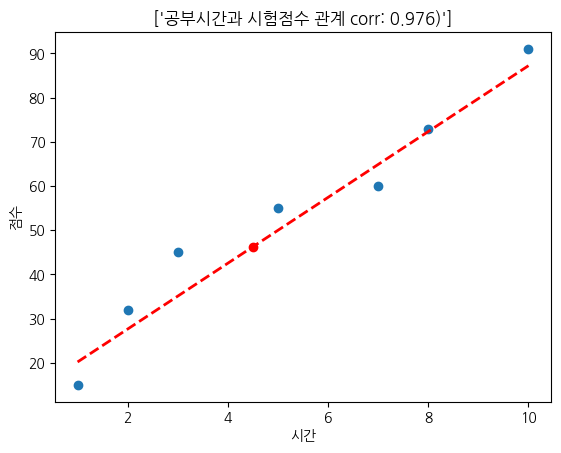

In [150]:
pre_ = lrModel.predict(newDF)
print(f"{pre_}")

# 학습데이터
plt.scatter(dataDF.hour,dataDF.score)

# 새로운 데이터
plt.plot(newDF.hour,pre_,"ro")
x_line = featureDF
y_line = 7.446236559139786 * x_line + 12.747311827956985
plt.plot(x_line, y_line, "r--", linewidth=2)

plt.xlabel("시간")
plt.ylabel("점수")
# plt.grid()
plt.title([f"공부시간과 시험점수 관계 corr: {corr_value:.3f})"])
plt.show()

